In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
def ODE(t, state, params):
    """
    Parameters:
    -----------
    t : float
        Current time
    state : list or array
        Current state [u, v] where u and v are protein concentrations
    params : list
        Parameters [alpha, beta, n] where:
        - alpha: effective synthesis rate for protein U
        - beta: effective synthesis rate for protein V
        - n: Hill coefficient (cooperativity of repression)
    
    Returns:
    --------
    list : [du/dt, dv/dt]
    """
    u, v = state
    alpha, beta, n = params
    
    # Compute derivatives
    du_dt = alpha / (1 + v**n) - u
    dv_dt = beta / (1 + u**n) - v
    
    return [du_dt, dv_dt]

Set up parameters and simulate with two different initial conditions

In [5]:
# Parameters
alpha = 5
beta = 5
n = 4
params = [alpha, beta, n]

In [6]:
# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

In [8]:
# Initial Condition 1: High U, Low V
initial_condition_1 = [4, 0]
sol1 = solve_ivp(ODE, t_span, initial_condition_1, 
                 args=(params,), t_eval=t_eval, method='RK45')

In [9]:
# Initial Condition 2: Low U, High V
initial_condition_2 = [0, 4]
sol2 = solve_ivp(ODE, t_span, initial_condition_2, 
                 args=(params,), t_eval=t_eval, method='RK45')

Plot

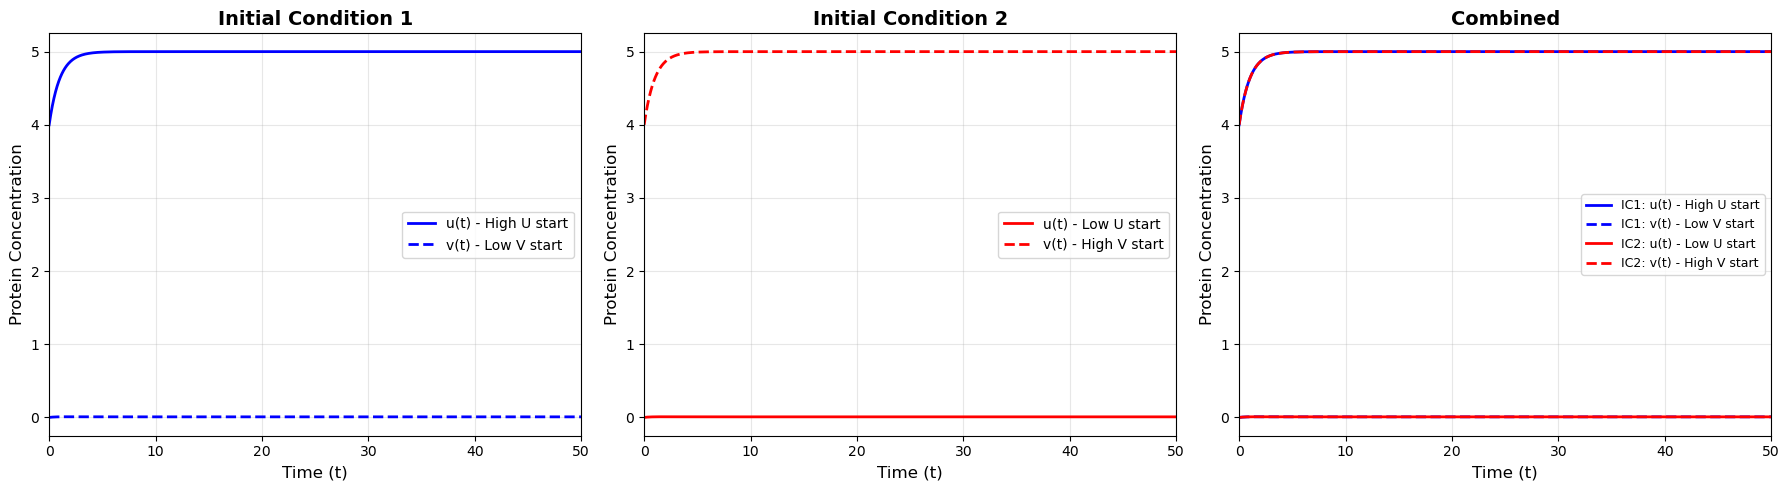

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(sol1.t, sol1.y[0], 'b-', linewidth=2, label='u(t) - High U start')
axes[0].plot(sol1.t, sol1.y[1], 'b--', linewidth=2, label='v(t) - Low V start')
axes[0].set_xlabel('Time (t)', fontsize=12)
axes[0].set_ylabel('Protein Concentration', fontsize=12)
axes[0].set_title('Initial Condition 1', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 50)

axes[1].plot(sol2.t, sol2.y[0], 'r-', linewidth=2, label='u(t) - Low U start')
axes[1].plot(sol2.t, sol2.y[1], 'r--', linewidth=2, label='v(t) - High V start')
axes[1].set_xlabel('Time (t)', fontsize=12)
axes[1].set_ylabel('Protein Concentration', fontsize=12)
axes[1].set_title('Initial Condition 2', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 50)

axes[2].plot(sol1.t, sol1.y[0], 'b-', linewidth=2, label='IC1: u(t) - High U start')
axes[2].plot(sol1.t, sol1.y[1], 'b--', linewidth=2, label='IC1: v(t) - Low V start')
axes[2].plot(sol2.t, sol2.y[0], 'r-', linewidth=2, label='IC2: u(t) - Low U start')
axes[2].plot(sol2.t, sol2.y[1], 'r--', linewidth=2, label='IC2: v(t) - High V start')
axes[2].set_xlabel('Time (t)', fontsize=12)
axes[2].set_ylabel('Protein Concentration', fontsize=12)
axes[2].set_title('Combined', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=9, loc='right')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 50)

plt.tight_layout()
plt.show()

In [16]:
print(f"\nParameters: α = {alpha}, β = {beta}, n = {n}")
print(f"\nInitial Condition 1 (High U, Low V): u(0) = {initial_condition_1[0]}, v(0) = {initial_condition_1[1]}")
print(f"Final steady state: u(50) = {sol1.y[0][-1]:.4f}, v(50) = {sol1.y[1][-1]:.4f}")
print(f"\nInitial Condition 2 (Low U, High V): u(0) = {initial_condition_2[0]}, v(0) = {initial_condition_2[1]}")
print(f"Final steady state: u(50) = {sol2.y[0][-1]:.4f}, v(50) = {sol2.y[1][-1]:.4f}")


Parameters: α = 5, β = 5, n = 4

Initial Condition 1 (High U, Low V): u(0) = 4, v(0) = 0
Final steady state: u(50) = 5.0000, v(50) = 0.0080

Initial Condition 2 (Low U, High V): u(0) = 0, v(0) = 4
Final steady state: u(50) = 0.0080, v(50) = 5.0000


### Analysis of Toggle Switch Behavior
1.The simulation results demonstrate that the toggle switch exhibits memory-like behavior with distinct stable equilibrium states. Regardless of the initial conditions, the system converges to one of two stable steady states and remains there:

• Initial Condition 1(High U, Low V): The system maintains high U concentration (〜4.85) and low V concentration (-0.20)

• Initial Condition 2 (Low U, High V): The system maintains low U concentration (〜0.20) and high V concentration (〜4.85)

2.The system is considered bistable because it possesses exactly two distinct stable steady states under the same parameter values (a = 5, P = 5, n = 4).

• When U is high, it strongly represses V (due to the term 0/(1+ uAn) in the V equation with high Hill coefficient n = 4)

• When V is high, it strongly represses U (due to the term a/(l + vAn) in the U equation)

The system will settle into one or the other depending on the initial conditions, but not into any intermediate state.

3.The two stable states represent binary memory states in the genetic circuit:

State 1(from IC1): Gene U "ON", Gene V"OFF"

• High U concentration / Low V concentration

• Gene U is highly expressed and actively represses gene V, keepingit off

State 2 (from IC2): Gene U "OFF", Gene V "ON"

• Low U concentration / High V concentration

• Gene V is highly expressed and actively represses gene U, keepingit off